Block by Block 2010 Census Data
===
<img src="examples/boswash small.png">
**The Eastern Seaboard from Washington DC to Boston**

The above image is a rendering of population density for every block from Boston to Washington, DC. This is known as the Boswash corridor. On the [full size](https://github.com/patmarks/Ipython-Notebooks/raw/master/census/examples/boswash%20large.png) (6MB) image, the level of detail is such one can zoom in enough to see individual neighborhoods and parks in the eastern seaboard. 

The motivation for this project was that, despite a variety of census tools online (eg [American Fact Finder](http://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml), [census reporter](http://censusreporter.org)), there were none for data visualization at the block level. 


System requirements:
1. Pyshp and Matplotlib libraries
2. For a large state like New York, at least 4GB of RAM is needed

Data needed:
This  notebook requires downloading each file for states of interest: 
1. The [sf1](http://www2.census.gov/census_2010/04-Summary_File_1/) file.
2. The [shapefile](http://www2.census.gov/geo/tiger/TIGER2010/TABBLOCK/2010/) tl_2010_xx_tabblock10.zip, where xx is the two digit [FIPS code](http://www.census.gov/geo/reference/ansi_statetables.html) for the state. 
3. [Data Dictionary](https://www.socialexplorer.com/data/C2010/metadata/?ds=SF1) to reference the data. For example, 'P0010001' is the code for total population.

####CLASSES:
The **StateHeaderAndShape** class contains all shapefile data such as StateHeaderAndShape.xy and StateheaderAndShape.xy_geoid. These are from the TIGER shapefile alone. It also contains **sf1Reader** and  **GeoHeader** instances as **StateHeaderAndShape.sf1** and **StateHeaderAndShape.header.**

When creating a StateHeaderAndShape object, the arguments need are:
* state_string. The lower case two letter abbreviation for the state
* shape_path: The path to the shapefile
* sf1_path: the path to the sf1 file
* descriptor_path, if the data_descriptor.text is not in the working directory

Each object takes a significant chunk of memory, since it's loading every single block of the state into the memory. On a computer with a AMD FX-6300 CPU and 16gb of RAM and Linux Mint 17.1, Rhode Island takes about 3 seconds to load, while New York takes a minute.


The **GeoHeader** class takes a path to an sf1 file as a parameter, and is parses the geographic data within the sf1 file. It is primarily used for the GeoHeader.geodict dictionary, which converts geoIDs to logicalrecordnumbers.

The **sf1Reader** class takes a path to an sf1 file, and is used to parse the census data. The *read* method takes a census datareturns a dictionary that has logical record numbers as keys, and the census datum as the value.

####METHODS:
The **plot_map** function is used to output a matplotlib drawing of the sf1 data.



###Larger versions of some of the images rendered here are available at the links below:


In [10]:
from IPython.display import FileLink, FileLinks
FileLinks('examples')

examples/
  Rhode Island.png
  boswash small.png
  New England Large.png
  NYC.png
  boswash large.png

Starting Small with Rhode Island
===

Here, we make the RI StateHeaderAndShape object:

In [1]:
import blockbyblock2010 as bbb
%matplotlib inline

In [2]:
RI = bbb.StateHeaderAndShape('ri',shape_path='census data/2010census/ri/tl_2010_44_tabblock10/tl_2010_44_tabblock10',
                         sf1_path='/home/pm/Documents/ipython/census/census data/2010census/ri/sf1/')

read header and shapefiles in 4.4s


And use the bbb.plot_map function to display the population density of Rhode Island, using every single block. This is done by using the datacode='P0010001', which is total population. The density flag is then set to true, so the population is divided by the area of the shape. 

Values above 32364.714603409935 people per sq mile are treated the same


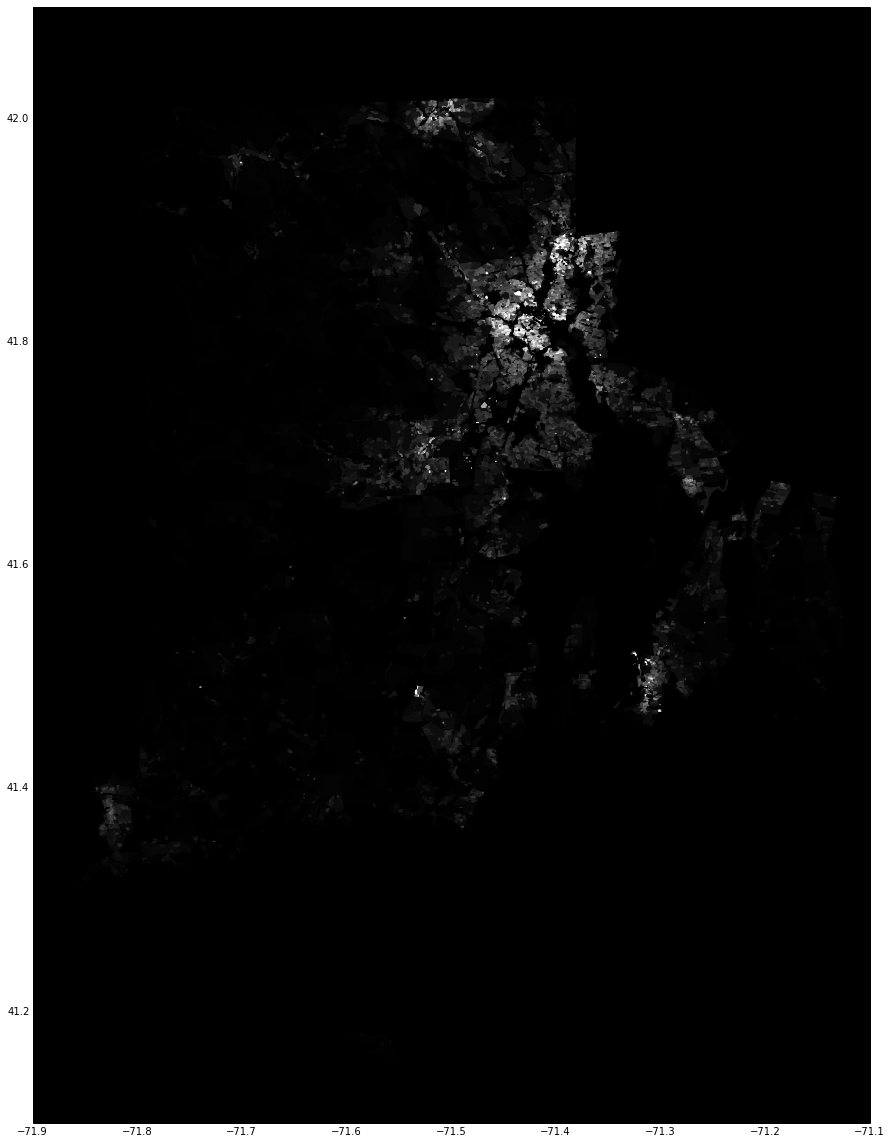

In [3]:
bbb.plot_map([RI],datacode='P0010001',size=(15,20),density=True,bg=(0,0,0),
         cmap=bbb.cm.gray,vmaxpercentile=.01,
         vminpercentile='min')

The summary level can also be changed if a different shapefile is used. Here, we use the census_tract shapefile, and the it automatically adjusts to display the census-tract summary level:

read header and shapefiles in 0.1s
read sf1 file in 0.0s
Values above 18379.210064694977 people per sq mile are treated the same


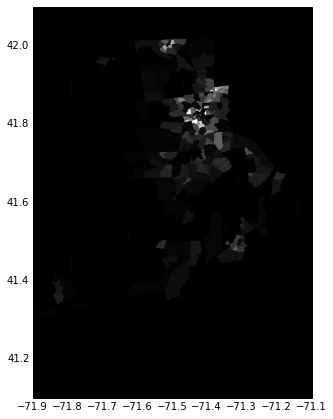

In [4]:
RI_tracts = bbb.StateHeaderAndShape('ri',shape_path='/home/pm/Documents/ipython/census/census data/2010census/ri/tl_2010_44_tract10/tl_2010_44_tract10',
                         sf1_path='/home/pm/Documents/ipython/census/census data/2010census/ri/sf1/')
bbb.plot_map([RI_tracts],datacode='P0010001',size=(5,7),density=True,bg=(0,0,0),
         cmap=bbb.cm.gray,vmaxpercentile=.01,
         vminpercentile='min')
RI_tracts=None

###### Zooming in

The axes keyword can be used to zoom into the picture. Here's a detail of the capital city, Providence. You can see the large swaths of commercial and industrial districts, and highways that carve the city neighborhoods up. The background is changed to blue, so you can see the difference between water and depopulated areas. A more interesting colormap is also used (cmap=bbb.cm.gist_heat).

Values above 32393.833624200113 people per sq mile are treated the same


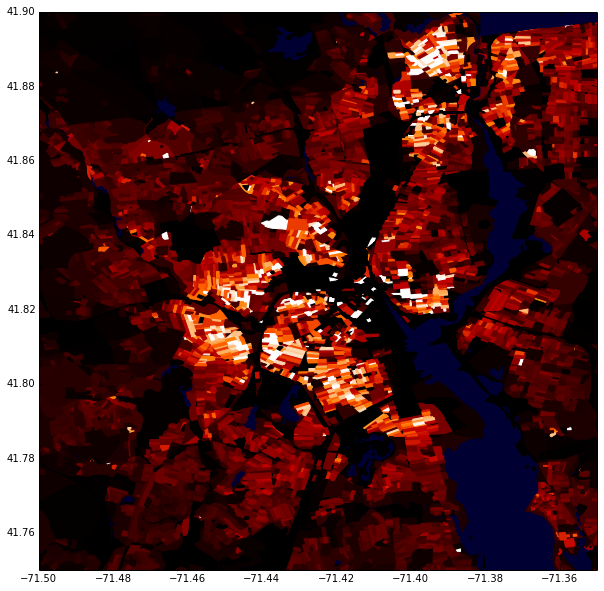

In [19]:
bbb.plot_map([RI],datacode='P0010001',axes=[-71.5,-71.35,41.75,41.9],size=(10,10),density=True,bg=(0,0,.2),
         cmap=bbb.cm.gist_heat,vmaxpercentile=.01)

###### Demographics

We can also look at percentages with this data to look at things like racial demographics of the area. P0040003 is the datacode for all "Hispanic or Latino" people. density = False, and percentage = True.


Values above 518000.0 people per sq mile are treated the same


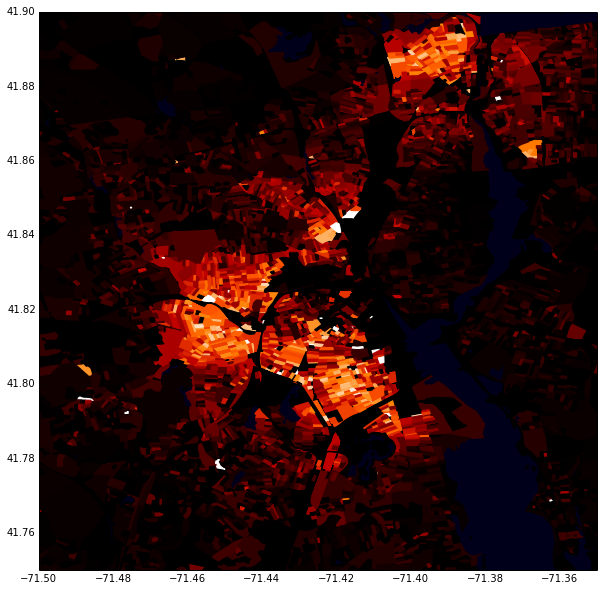

In [25]:
bbb.plot_map([RI],datacode='P0040003',axes=[-71.5,-71.35,41.75,41.9],size=(10,10),percentage=True,density=False,bg=(0,0,.1),
         cmap=bbb.cm.gist_heat, vminpercentile='min')

New England
===

###### Adding more states

The module can analyze more than one state at a time. Here, every state in New England is loaded and then drawn in one big picture.

The easy function is used to automate the process, since they're stored in uniform directories on this computer.

In [2]:
census2010folder='census data/2010census/'
def easy(state_string,state_num):
    sf1_path=census2010folder+state_string+'/sf1/'
    shape_path=census2010folder+state_string+ '/tl_2010_'+state_num+'_tabblock10/tl_2010_'+state_num+'_tabblock10'

    return bbb.StateHeaderAndShape(state_string,shape_path=shape_path,sf1_path=sf1_path)

In [4]:
MA=easy('ma','25')

read header and shapefiles in 26.s


In [5]:
CT=easy('ct','09')

read header and shapefiles in 14.s


In [6]:
ME=easy('me','23')

read header and shapefiles in 21.s


In [7]:
VT=easy('vt','50')

read header and shapefiles in 10.s


In [8]:
NH=easy('nh','33')

read header and shapefiles in 10.s


read sf1 file in 0.0s
read sf1 file in 0.1s
read sf1 file in 0.2s
read sf1 file in 0.0s
read sf1 file in 0.1s
read sf1 file in 0.0s
Values above 33304.6504883 people per sq mile are treated the same


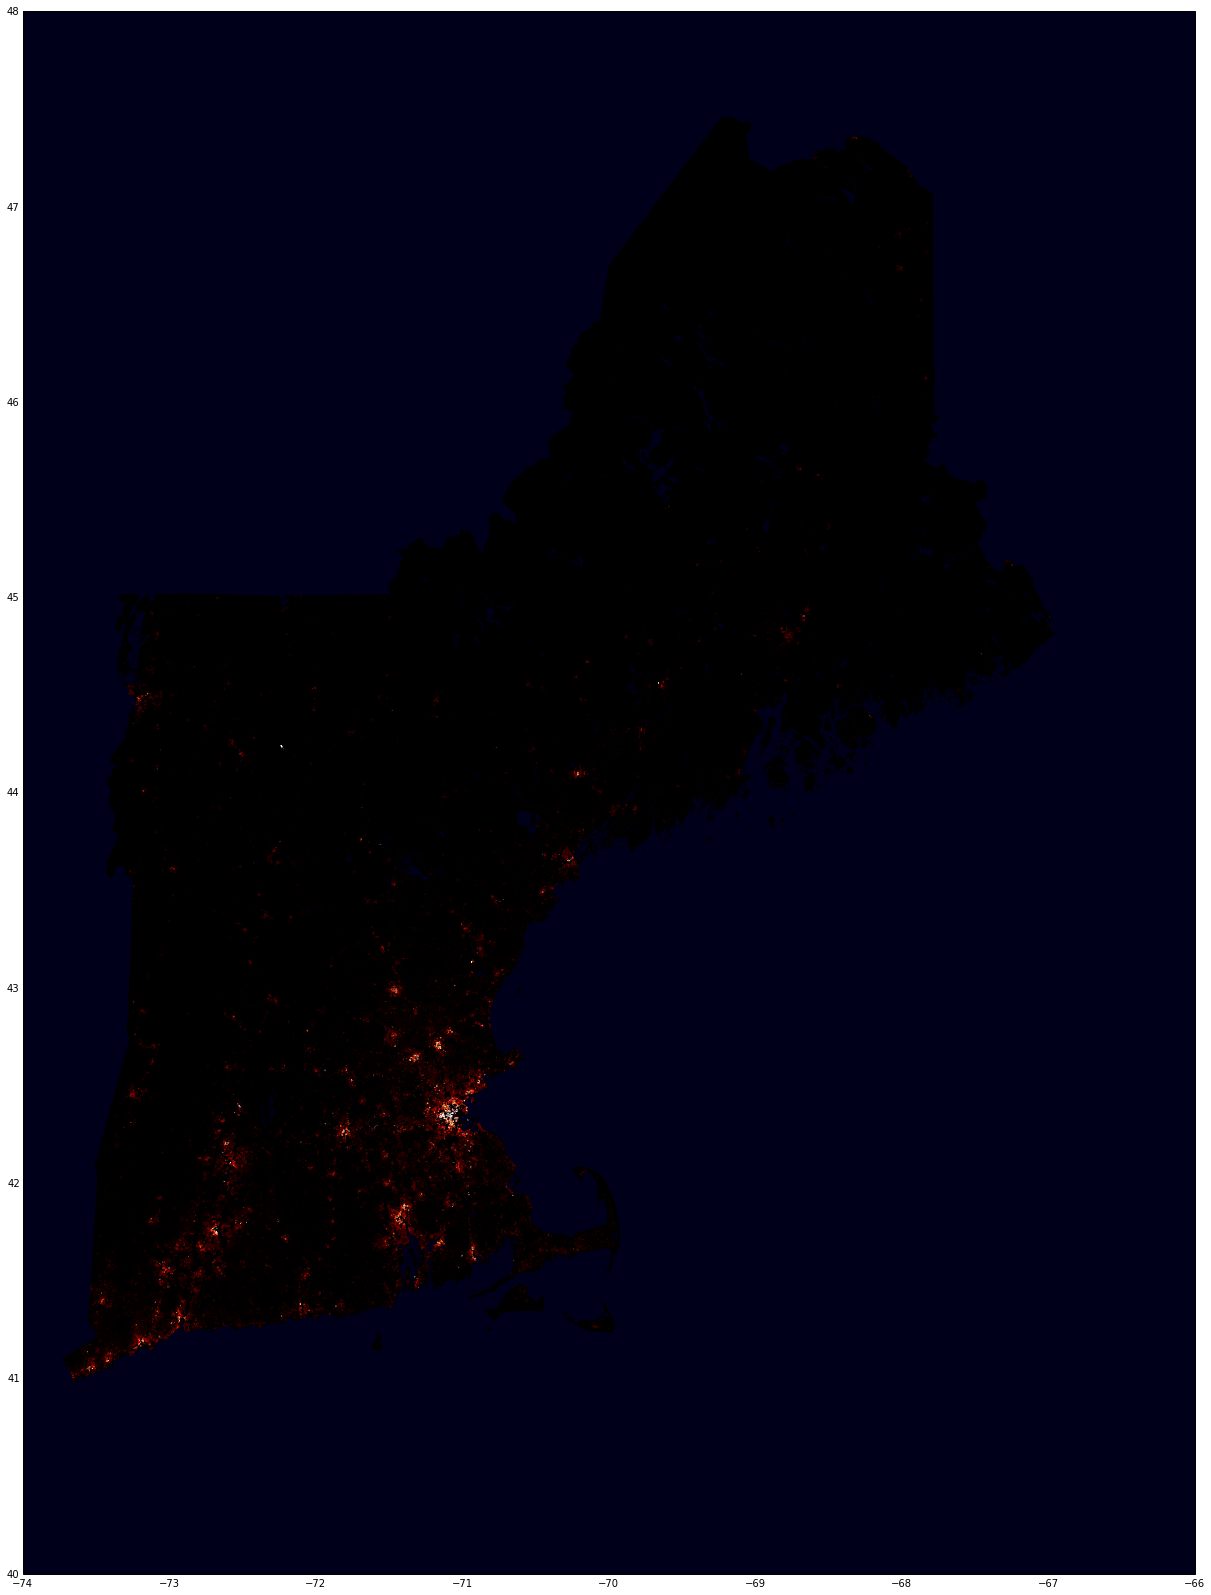

In [10]:
bbb.plot_map([RI,CT,MA,NH,ME,VT],datacode='P0010001',percentage=False,density=True,bg=(0,0,.1),
         cmap=bbb.cm.gist_heat,vmaxpercentile=.01,
         vminpercentile='min', size=(21,28))

###### Detail of the more populus part of MA-RI-CT

Values above 37291.907482016 people per sq mile are treated the same


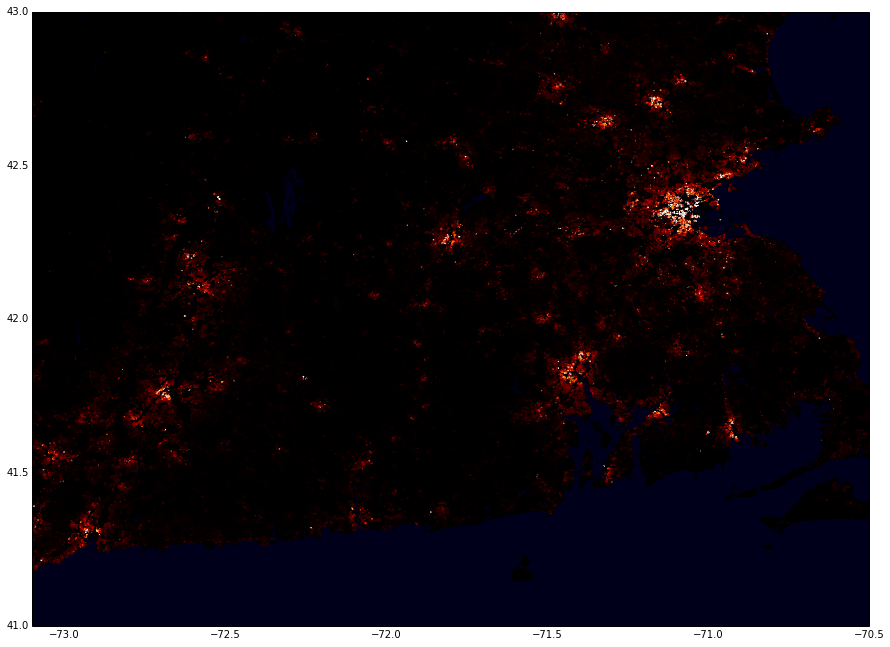

In [10]:
bbb.plot_map([RI,CT,MA,NH,ME,VT],datacode='P0010001',axes=[-73.1,-70.5,41,43],percentage=False,density=True,bg=(0,0,.1),
         cmap=bbb.cm.gist_heat,vmaxpercentile=.01,
         vminpercentile='min', size=(15,11))

At this point, python is using 4GB of memory because the shapefiles are read in full and stored in RAM. While this is very memory-intensive, it makes the actual drawing of the map much faster. These can be cleared by setting the object equal to None.

In [22]:
RI,MA,CT,ME,NH,VT=None,None,None,None,None,None

New York City
====

In [3]:
NY = easy('ny','36')
NJ = easy('nj','34')


read header and shapefiles in 69.s
read header and shapefiles in 28.s


###### NYC total population

Values above 128676.65758401454 people per sq mile are treated the same


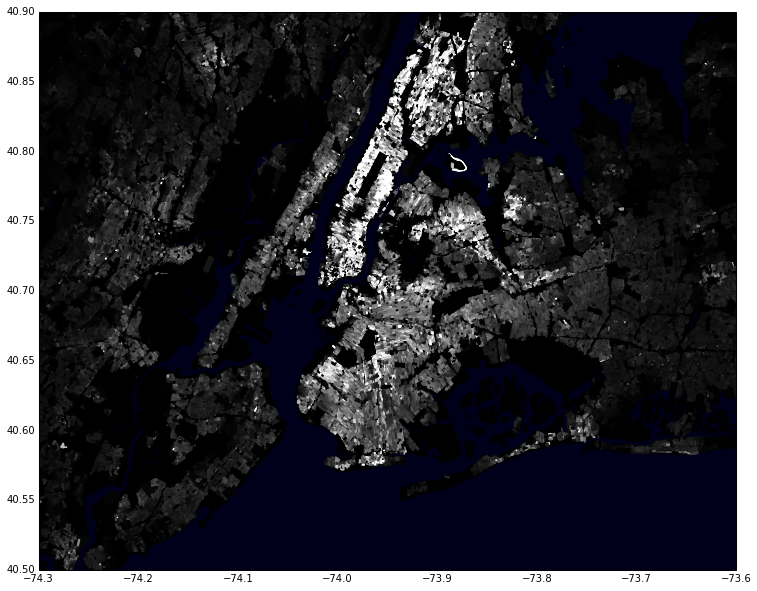

In [9]:
bbb.plot_map([NY,NJ],datacode='P0010001',axes=[-74.3,-73.6,40.5,40.9],percentage=False,density=True,bg=(0,0,.1),
         cmap=bbb.cm.gray,vmaxpercentile=.01,
         vminpercentile='min', size=(12.5,10))

###### Percentage of 18 to 34 year olds in NYC

Instead of using the census datacode, a custom data dictionary can also be constructed and used for a single state. The datadictionary must use geoIDs for keys.

There doesn't exist a census  segment for the 18 to 34 year year old demographic\*. However, the demographics Male/female  18-19, 20, 21, etc. can be added up to make the 18 to 24 demographic. 

\*Although as of 2015, these 18-34 year olds are now 23-39.

In [15]:
def adddemos(States,demographics):
    pop=dict()
    for State in States:
        newDemo=State.sf1.read(demographics[0])
        for logrecno in newDemo:
                geoid = State.header.geodict[logrecno]
                pop[geoid]=newDemo[logrecno]
        newDemo=None
        for demo in demographics[1:]:
            newDemo=State.sf1.read(demo)

            for logrecno in newDemo:
                geoid = State.header.geodict[logrecno]
                pop[geoid]+=newDemo[logrecno]
            new=None
    return pop

pop18to34=adddemos([NY,NJ],['P0120007','P0120008','P0120009','P0120010','P0120011','P0120012',
         'P0120031','P0120032','P0120033','P0120034','P0120035','P0120036'])

Values above 1369581.1518324604 people per sq mile are treated the same


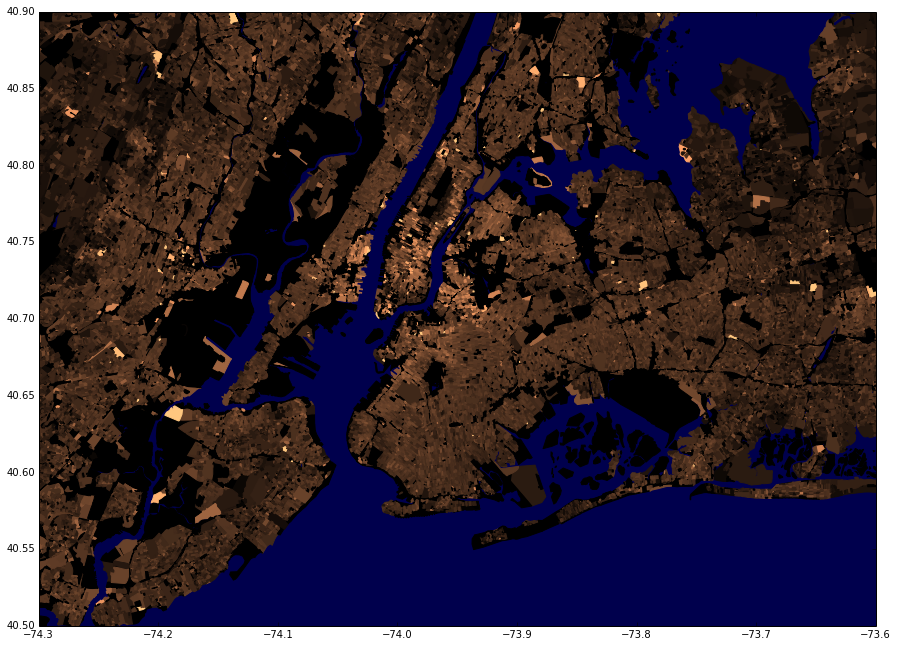

In [20]:
bbb.plot_map([NY,NJ],datacode=pop18to34,axes=[-74.3,-73.6,40.5,40.9],percentage=True,density=False,bg=(0,0,.3),
         cmap=bbb.cm.copper,vmaxpercentile=.01,
         vminpercentile='min', size=(15,11))

In [25]:
NY,NJ=None, None